In [27]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
file_name_CARGO = "Контейнерные перевозки (просто сегменты).xlsx"
df = pd.read_excel(file_name_CARGO, skiprows=5, skipfooter=11, sheet_name="Сегменты", index_col=0)
df = df.drop(columns={"Рынок итого", "ЕТС итого", "Доля ЕТС"})
df = df.iloc[: , :-26]
df = df.fillna(df.mean())
df = df.T
df = df[['ЛПК', 'Химическая продукция', 'Машиностроение и металлообработка', 'Черная металлургия', 'Жидкие химикаты']]
df

file_name_VVP = "ввп.xlsx"
VVP = pd.read_excel(file_name_VVP, skiprows=32, index_col=0).filter(['дата', 'ВВП (млрд руб)'])
# VVP

file_name_TRAFFIC = "грузооборот по россии.xlsx"
TRAFFIC = pd.read_excel(file_name_TRAFFIC, skiprows=29, index_col=0).filter(['дата', 'грузооборот (млрд т-км)'])
# TRAFFIC

df.index.astype('datetime64[ns]')
VVP.index.astype('datetime64[ns]')
TRAFFIC.index.astype('datetime64[ns]')

new_df = df.merge(TRAFFIC, on=df.index)
new_df = new_df.rename(columns={'key_0': 'дата'})
new_df = new_df.set_index('дата')
new_df
new_df_2 = new_df.merge(VVP, on=new_df.index)
new_df_2 = new_df_2.rename(columns={'key_0': 'дата'})
new_df_2 = new_df_2.set_index('дата')
df = new_df_2

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
Z = df.iloc[:, :].values

df

,ЛПК,Химическая продукция,Машиностроение и металлообработка,Черная металлургия,Жидкие химикаты,грузооборот (млрд т-км),ВВП (млрд руб)
дата,,,,,,,
2019-01-01,940054.0,358995.0,359975.0,324093.0,396797.0,235.7,8661.645785
2019-02-01,934602.0,373480.0,394487.0,293906.0,369341.0,216.2,8045.220640
2019-03-01,1119164.0,448113.0,424394.0,328754.0,423316.0,250.6,8587.884798
2019-04-01,1153440.0,421184.0,416330.0,349420.0,392853.0,244.1,8455.099695
2019-05-01,1018421.0,439188.0,438876.0,365331.0,406099.0,249.0,9167.024626
2019-06-01,971184.0,476841.0,460116.0,368586.0,407960.0,231.3,8396.587808
2019-07-01,1104764.0,498014.0,492318.0,403504.0,406910.0,239.1,10046.587111
2019-08-01,1089044.0,478482.0,480080.0,365178.0,425611.0,240.5,9198.789527
2019-09-01,1013004.0,457305.0,474989.0,352607.0,391574.0,237.6,9934.447438


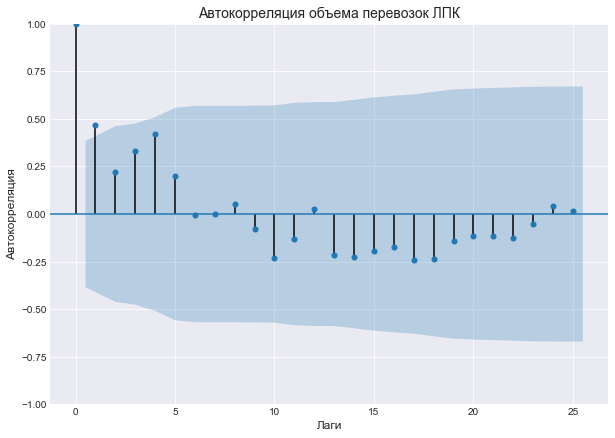

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Import plot_acf from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(10, 7))
# Plot ACF of JPM stock prices for past 40 lags
plot_acf(df['ЛПК'], lags=25)
plt.xlabel('Лаги', fontsize=12)
plt.ylabel('Автокорреляция', fontsize=12)
plt.title('Автокорреляция объема перевозок ЛПК', fontsize=14)
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['ЛПК'])
print('p-value: %.2f' % result[1])

p-value: 0.03


In [14]:

df['Разница ЛПК'] = df['ЛПК'].diff()

result = adfuller(df['Разница ЛПК'].dropna())
print('p-value: %.2f' % result[1])

p-value: 0.00


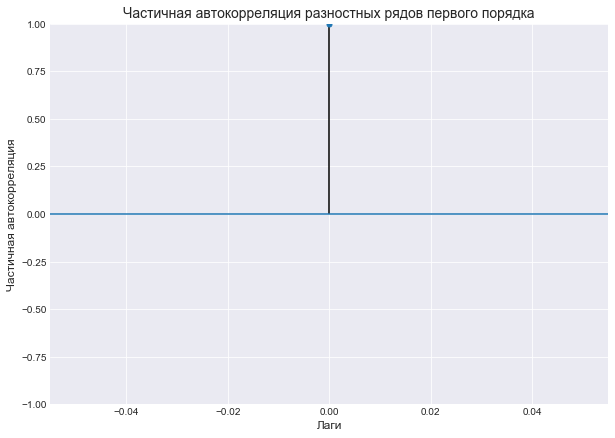

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
# Plot PACF of JPM stock price of past 40 lags
plot_pacf(df['Разница ЛПК'], lags=12)
plt.xlabel('Лаги', fontsize=12)
plt.ylabel('Частичная автокорреляция', fontsize=12)
plt.title('Частичная автокорреляция разностных рядов первого порядка', fontsize=14)
plt.show()

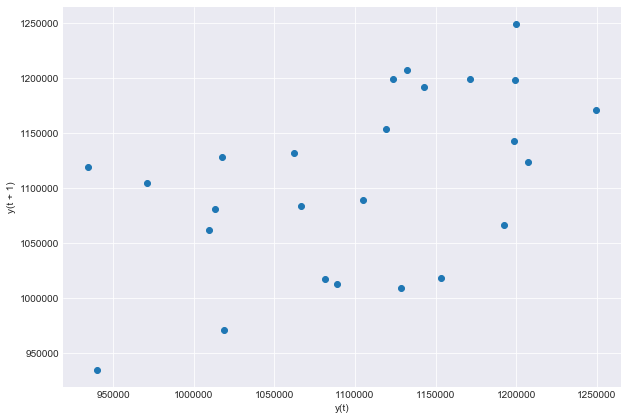

In [30]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(df['ЛПК'])
pyplot.show()

In [23]:
from pandas import DataFrame
from matplotlib import pyplot
values = DataFrame(df.iloc[:, 0].values)
# values = df.iloc[:, 0].values
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.506105
t+1  0.506105  1.000000


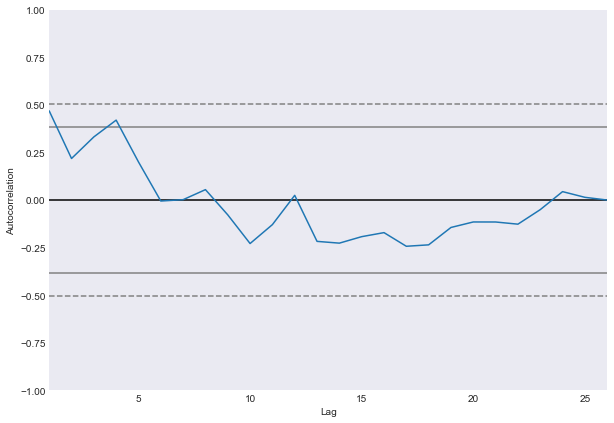

In [24]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.iloc[:, 0])
pyplot.show()

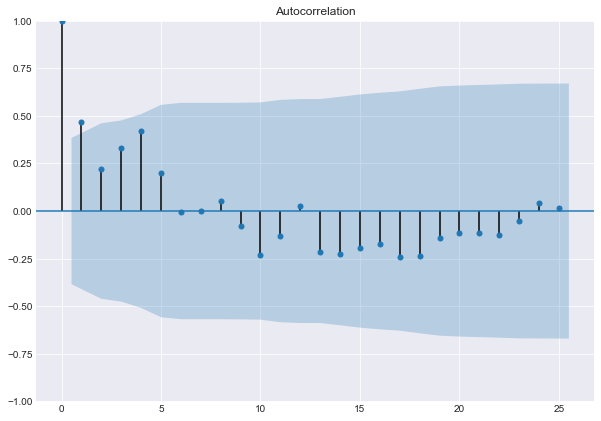

In [26]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.iloc[:, 0], lags=25)
pyplot.show()